# Problem Statement

Our client is an Insurance company which has provided Health Insurance to its customers. Now, it wants to know whether its customers need Vehicle Insurance or not, so we have to build a model to predict whoever will be interested in Vehicle Insurance provided by the company.

# Data Description

This dataset contains information about customers who all are buying Health Insurance.Our aim is to find that which customer is ready to take Vehicle Insurance also.

**Id:**Unique ID for customers

**Gender:** Gender of the customer

**Age:**Age of the customer

**Driving_License:**0: Customer does not have DL. 1: Customer already has DL

**Region_Code:**Unique code for region of the customer

**Previously_Insured:**0: Customer does not have Vehicle Insurance. 1:Customer already has Vehicle       Insurance

**Vehicle_Age**: Age of the Vehicle

**Vehicle_Damage**: 0: Customer didn’t get his/her damaged vehicle in the past. 1: Customer got his/her vehicle damaged in the past

**Annual_Premium**: The amount needs to pay as premium in the year

**PolicySalesChannel**: Anonymized Code for the channel of outreaching to the customer, i.e. Different Agents, Over Mail, Over Phone, In person, etc.

**Vintage**: Number of Days customer has been associated with the company

**Response**: 0:Customer is not interested. 1: Customer is interested



# Import Libraries & Dataset

In [93]:
#import numpy
import numpy as np

#import pandas
import pandas as pd

#import subpackage of matplotlib
import matplotlib.pyplot as plt

#import seaborn
import seaborn as sns 

#import warnings
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

#import standard scalar to perform scaling
from sklearn.preprocessing import StandardScaler

#import logistic regression algorithm
from sklearn.linear_model import LogisticRegression

#import various function from sklearn library
from sklearn.linear_model import Lasso,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score
from sklearn.metrics import cohen_kappa_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

#import various function from statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import smote for balancing data
from imblearn.over_sampling import SMOTE

#import counter to count the values based on each category
from collections import Counter

#Ensemble techniques
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [3]:
df_health= pd.read_csv('C:/Users/Sharon/Downloads/HealthInsCrosSelPredict/train.csv')
df_health.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Exploratory Data Analysis(EDA)

In [4]:
df_health.shape

(381109, 12)

## Checking Data types 

In [5]:
df_health.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Data type Conversion

In [6]:
df_health['Driving_License']=df_health['Driving_License'].astype('object')
df_health['Previously_Insured']=df_health['Previously_Insured'].astype('object')
df_health.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License          object
Region_Code             float64
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Checking for Null /Missing Values & Duplicates

In [7]:
df_health.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values

In [8]:
df_health.duplicated().value_counts()

False    381109
dtype: int64

There are no duplicates

## Understanding the data

In [9]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 34.9+ MB


## Describing the numerical columns of the data

In [10]:
numerical_columns=['Age','Annual_Premium','Vintage']

In [11]:
df_health[numerical_columns].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


# Univariate Analysis

## Target Variable: Response

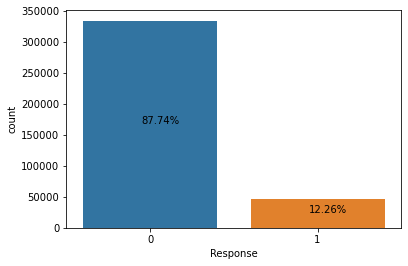

In [12]:
sns.countplot(df_health['Response']);
pct_0=str(round(df_health['Response'].value_counts()[0]*100/len(df_health),2)) + str('%')
pct_1=str(round(df_health['Response'].value_counts()[1]*100/len(df_health),2)) + str('%')
plt.text(x=-0.05,y=df_health['Response'].value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=df_health['Response'].value_counts()[1]/2,s=pct_1)
plt.show()


Inference:
Number of people who are NOT interested: 334399 and its percentage is 87.7
4%
Number of people who are interested: 46710 and its percentage is 12.26%

## Age Dist.

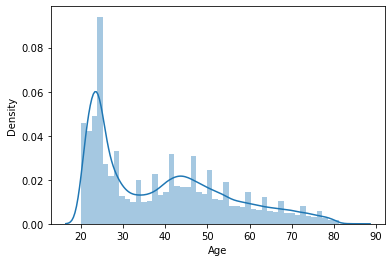

In [13]:
sns.distplot(df_health.Age);
plt.show()

Inference: The Age feature is right skewed.

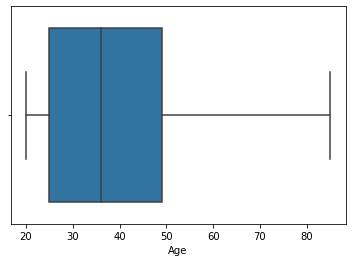

In [14]:
sns.boxplot(df_health.Age)
plt.show()

Inference:The middle 50% Age values lies between 25 to 49

## Customers Having Vehicle Insurance already

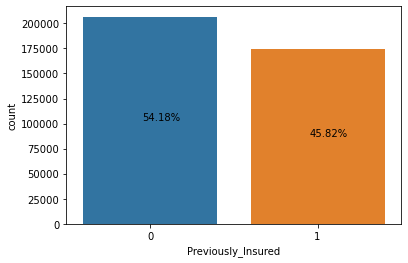

In [15]:
sns.countplot(df_health['Previously_Insured'])
pct_0=str(round(df_health['Previously_Insured'].value_counts()[0]*100/len(df_health),2)) + str('%')
pct_1=str(round(df_health['Previously_Insured'].value_counts()[1]*100/len(df_health),2)) + str('%')
plt.text(x=-0.05,y=df_health['Previously_Insured'].value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=df_health['Previously_Insured'].value_counts()[1]/2,s=pct_1)
plt.show()

In [16]:
df_health['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

Inference: 206481 customers who account to 45.82% of the data who already have vehicle insurance and 174628 customers who make upto 54.18% of data does not have Vehicle Insurance, which is significant for us.

## Vehicle Age

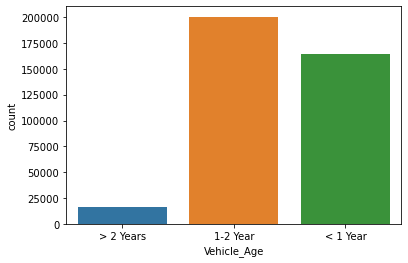

In [17]:
sns.countplot(df_health.Vehicle_Age)
plt.show()

Inference: Majority of customers present in he data have vehice which is 1 to 2 years of age, followed by people with less than a year of
vehicle age and very few have vehicle which are more than 2 years of age. This implies the majority of the peolpe in the 
dataset have new vehicles.

## Customers having damaged vehicle

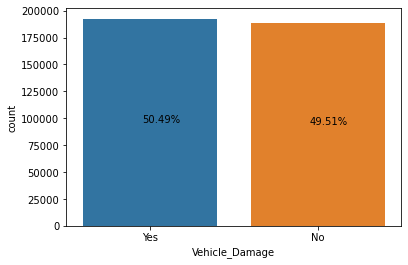

In [18]:
sns.countplot(df_health['Vehicle_Damage'])
pct_0=str(round(df_health['Vehicle_Damage'].value_counts()[0]*100/len(df_health),2)) + str('%')
pct_1=str(round(df_health['Vehicle_Damage'].value_counts()[1]*100/len(df_health),2)) + str('%')
plt.text(x=-0.05,y=df_health['Vehicle_Damage'].value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=df_health['Vehicle_Damage'].value_counts()[1]/2,s=pct_1)
plt.show()

 Inference: The dataset contains almost equal number of people with damaged vehicle as compared to non damaged vehicle.

# Bi-Variate Analysis

## Age vs Annual Premium

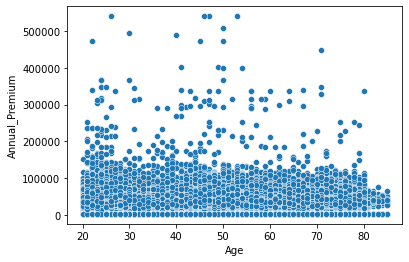

In [19]:
sns.scatterplot(x=df_health['Age'],y=df_health['Annual_Premium'])
plt.show()

Inference: There is no significant relationship between Age and Annual Premium

## Gender & Response

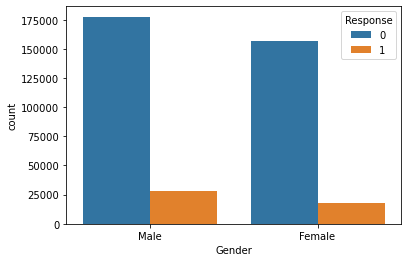

In [20]:
sns.countplot(df_health['Gender'],hue=df_health['Response'])
plt.show()

Inference: The number of Males, who have not insured their vehicle till now is more than females and same pattern is observed when
we comapre the males and females who have already insured.

## Driving License By Gender

In [21]:
b=df_health.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
b

,Gender,Driving_License
0,Female,175020
1,Male,206089


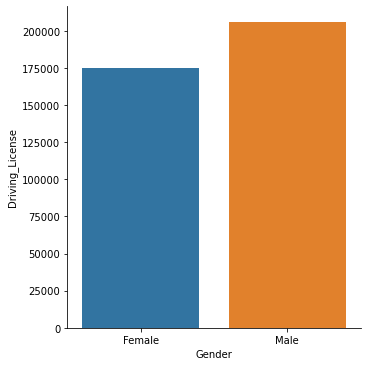

In [22]:
sns.catplot(x="Gender", y="Driving_License", data=b, kind="bar");

Inference: Number of Males having driving Licences is more as compared to those of Females.

## Customers Having Vehicle Insurance already vs Gender

In [23]:
df_plot = df_health.groupby(['Previously_Insured', 'Gender']).size().reset_index().pivot(columns='Gender', index='Previously_Insured', values=0)
df_plot

Gender,Female,Male
Previously_Insured,,
0,87071,119410
1,87949,86679


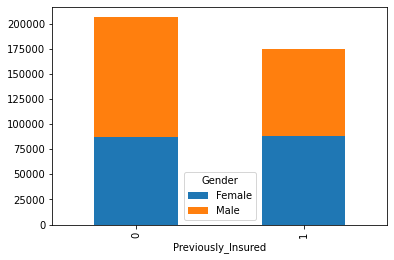

In [24]:
df_plot.plot(kind='bar',stacked=True)
plt.show()

Inference: The number of females who have previously taken and not taken insurance is almost same and the number of males who have previously not taken insurance is significantly more, which becomes the potential customer base for cross-selling
vehicle insurance.

## Age vs Vehicle_Damage

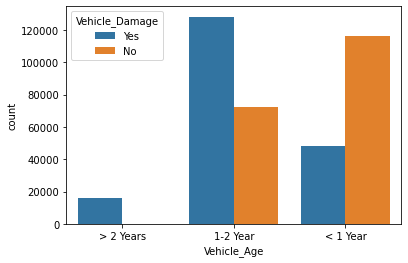

In [27]:
sns.countplot(df_health['Vehicle_Age'],hue=df_health['Vehicle_Damage'])
plt.show()

Inference: The majority of vehicles which are less than 1 year are not damaged

The vehicles which has >2 years age are almost damaged vehicles

The majority of vehicles which has 1-2 years of age are damaged vehicles.

# Multi-Variate Analysis

## Annual Premium

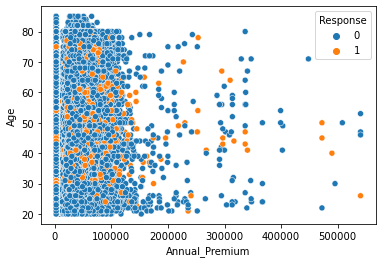

In [31]:
sns.scatterplot(x='Annual_Premium',y='Age',hue='Response',data=df_health)
plt.show()

Inference: Most of the people have annual premium less than 1.5 lakhs

Majority of people interested in vehicle insurance also have annual premium less than 1.5 lakhs.

# Data Preparation

## Drop the redundant feature

In [32]:
df_health=df_health.drop('id',axis=1)

Inference: Now, the column ‘Id’ has dropped

## Treating Outliers

<AxesSubplot:>

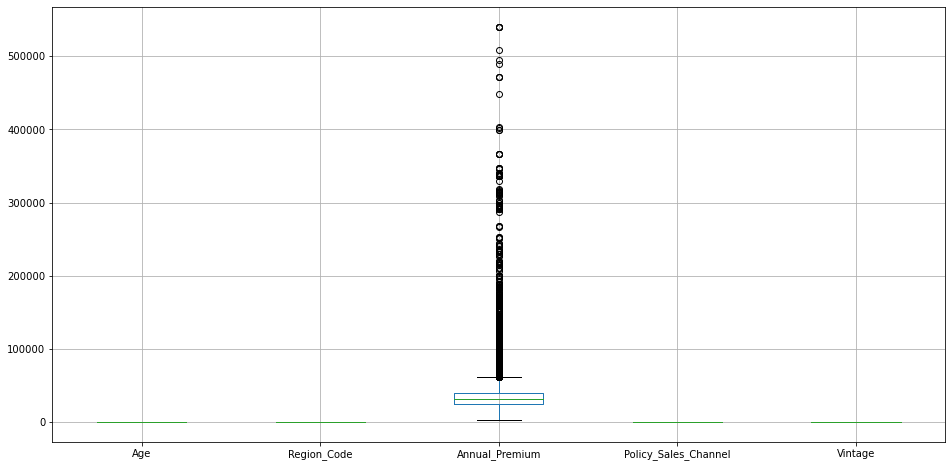

In [33]:
df_num=df_health.select_dtypes('number').drop('Response',axis=1)
df_num.boxplot(figsize=(16,8))

In [34]:
Q1 = df_health['Annual_Premium'].quantile(0.25)

Q3 = df_health['Annual_Premium'].quantile(0.75)

IQR = Q3 - Q1

df_health = df_health[~((df_health['Annual_Premium'] < (Q1 - 1.5 * IQR)) | (df_health['Annual_Premium'] > (Q3 + 1.5 * IQR)))]

# check the shape of the data
df_health.shape

(370789, 11)

<AxesSubplot:xlabel='Annual_Premium'>

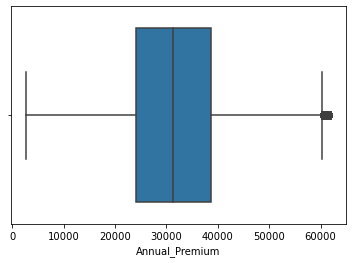

In [35]:
sns.boxplot(df_health['Annual_Premium'])

Inference: We have treated the outliers using IQR method

# Basic Model

## Logistic Regression model from StatsModel(sm)

In [36]:
df_num=df_health.select_dtypes('number').drop('Response',axis=1)
df_obj=df_health.select_dtypes('object')

encode=pd.get_dummies(df_obj,drop_first=True)


X=pd.concat([df_num,encode],axis=1)

y=df_health['Response']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

SS=StandardScaler()
scaling=SS.fit_transform(X_train,y_train)
#scaling_y=SS.transform(X_test,y_test)

model_no_intercept=sm.Logit(y_train,X_train).fit()
model_no_intercept.summary()

Optimization terminated successfully.
         Current function value: 0.274568
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:               296631
Model:                          Logit   Df Residuals:                   296620
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 May 2022   Pseudo R-squ.:                  0.2595
Time:                        18:14:25   Log-Likelihood:                -81446.
converged:                       True   LL-Null:                   -1.0998e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0289      0.001    -49.021      0.000      -0.030      -0.028
Region_Code              -0.0017      0.000     -3.570      0.000      -0.003      -0.001
Annual_Premium          2.18e-06   3.99e-07      5.470      0.000     1.4e-06    2.96e-06
Policy_Sales_Channel     -0.0027      0.000    -22.272      0.000      -0.003      -0.002
Vintage                  -0.0002    7.3e-05     -2.750      0.006      -0.000   -5.77e-05
Gender_Male               0.0729      0.013      5.787      0.000       0.048       0.098
Driving_License_1        -1.2154      0.046    -26.312      0.000      -1.306      -1.125
Previously_Insured_1     -4.0711      0.092    -44.321      0.000      -4.251      -3.891
Vehicle_Age_< 1 Year     -1.2386      0.021    -59.383      0.000      -1.279      -1.198
Vehicle_Age_> 2 Years     0.2116      0.022      9.606      0.000       0.168       0.255
Vehicle_Damage_Yes        1.8356      0.034     53.567      0.000       1.768       1.903
=========================================================================================
"""

Here,LLR-P val <0.05, So we can say that this is a significant model.

## Logistic Regression model from Sklearn library

In [37]:
log_reg=LogisticRegression()
model_full=log_reg.fit(X_train,y_train)

In [38]:
y_pred_prob=model_full.predict(X_test)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

accuracy=accuracy_score(y_pred,y_test)
print(round(accuracy*100,2),'%')

86.85 %


In [39]:
classifi_report=classification_report(y_test,y_pred)
print(classifi_report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     65173
           1       0.25      0.04      0.07      8985

    accuracy                           0.87     74158
   macro avg       0.57      0.51      0.50     74158
weighted avg       0.81      0.87      0.83     74158



In the Classification Report, the scores of Precision,Recall and F1score for Target 0 is very higher than Target 1.It seems it a highly imbalanced dataset.By using SMOTE tecnique, we can balance the dataset.


## Confusion matrix

<AxesSubplot:>

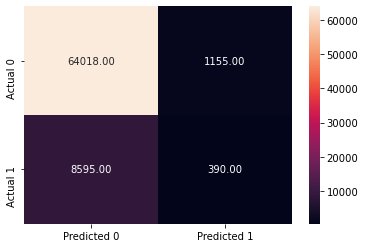

In [40]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],fmt='.2f')

Here, True Negative values are very higher than True Positive values and also False Negative values are higher than False Postitve values. 

### Percentage of imbalanced data

In [41]:
per_0=str(round(df_health['Response'].value_counts()[0]/df_health['Response'].count(),2)*100) + str('%')
per_1=str(round(df_health['Response'].value_counts()[1]/df_health['Response'].count(),2)*100) + str('%')

print('Percent for Target Variable 0:',per_0)
print('Percent for Target Variable 1:',per_1)

Percent for Target Variable 0: 88.0%
Percent for Target Variable 1: 12.0%


This dataset has been highly imbalanced.SO, treating imbalanced dataset by using SMOTE technique to make a balanced dataset.

In [42]:
smt = SMOTE(random_state=42,sampling_strategy=0.8)
X_res, y_res = smt.fit_resample(X, y)

print('Imbalanced data(Response):',Counter(y))
print('Balanced data by using SMOTE:',Counter(y_res))

Imbalanced data(Response): Counter({0: 325634, 1: 45155})
Balanced data by using SMOTE: Counter({0: 325634, 1: 260507})


### Percentage of balanced data

In [43]:
per_0=str(round(y_res.value_counts()[0]/df_health['Response'].count(),2)*100) + str('%')
per_1=str(round(y_res.value_counts()[1]/df_health['Response'].count(),2)*100) + str('%')

print('Percent for Target Variable 0:',per_0)
print('Percent for Target Variable 1:',per_1)

Percent for Target Variable 0: 88.0%
Percent for Target Variable 1: 70.0%


## Model after balancing data

In [44]:
#model-1
df_num=df_health.select_dtypes('number').drop('Response',axis=1)
df_obj=df_health.select_dtypes('object')

encode=pd.get_dummies(df_obj,drop_first=True)


X1=pd.concat([df_num,encode],axis=1)

y=df_health['Response']

X1_train,X1_test,y1_train,y1_test=train_test_split(X_res,y_res,random_state=1,test_size=0.2)

SS=StandardScaler()
scaling=SS.fit_transform(X1_train,y1_train)
#scaling_y=SS.transform(X_test,y_test)

model_no_intercept=sm.Logit(y1_train,X1_train).fit()
model_no_intercept.summary()

Optimization terminated successfully.
         Current function value: 0.404924
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:               468912
Model:                          Logit   Df Residuals:                   468901
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 May 2022   Pseudo R-squ.:                  0.4106
Time:                        18:14:59   Log-Likelihood:            -1.8987e+05
converged:                       True   LL-Null:                   -3.2213e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0401      0.000   -100.144      0.000      -0.041      -0.039
Region_Code               0.0006      0.000      1.727      0.084   -7.87e-05       0.001
Annual_Premium         3.699e-06   2.57e-07     14.412      0.000     3.2e-06     4.2e-06
Policy_Sales_Channel     -0.0022   8.09e-05    -26.744      0.000      -0.002      -0.002
Vintage               -2.315e-05   4.74e-05     -0.488      0.625      -0.000    6.98e-05
Gender_Male              -0.6747      0.008    -84.424      0.000      -0.690      -0.659
Driving_License_1         1.8356      0.029     64.117      0.000       1.780       1.892
Previously_Insured_1     -5.9651      0.088    -67.863      0.000      -6.137      -5.793
Vehicle_Age_< 1 Year     -2.4486      0.014   -176.501      0.000      -2.476      -2.421
Vehicle_Age_> 2 Years    -0.9835      0.018    -53.802      0.000      -1.019      -0.948
Vehicle_Damage_Yes        1.4004      0.015     90.969      0.000       1.370       1.431
=========================================================================================
"""

After balancing data, Pseudo R-square has been increased from 26% to 41%.

In [45]:
#Model-2
log_reg=LogisticRegression()
model_full=log_reg.fit(X1_train,y1_train)

In [46]:
y_pred=model_full.predict(X1_test)

accuracy=accuracy_score(y_pred,y1_test)
print(round(accuracy*100,2),'%')

58.88 %


In [47]:
classifi_report=classification_report(y1_test,y_pred)
print(classifi_report)

              precision    recall  f1-score   support

           0       0.61      0.74      0.67     65164
           1       0.55      0.40      0.46     52065

    accuracy                           0.59    117229
   macro avg       0.58      0.57      0.56    117229
weighted avg       0.58      0.59      0.58    117229



Now, the model is working well for both Target variable 0 and Target variable 1.Then,we can try multipe models by using ensemble techniques,and select the model with whichever gives higher accuracy.

## Finding Optimal Threshold

In [48]:
#finding optimal threshold by using Youden's Index
y_pred_prob=model_no_intercept.predict(X1_test)
fpr,tpr,threshold=roc_curve(y1_test,y_pred_prob)
youden_table=pd.DataFrame()
youden_table['TPR']=tpr
youden_table['FPR']=fpr
youden_table['Threshold']=threshold
youden_table['Difference']=youden_table['TPR']-youden_table['FPR']
youden_table.sort_values('Difference',ascending=False).reset_index(drop=True).head(10)

,TPR,FPR,Threshold,Difference
0,0.874830,0.255064,0.488700,0.619765
1,0.874791,0.255049,0.488781,0.619742
2,0.874657,0.254926,0.489261,0.619731
3,0.874791,0.255064,0.488772,0.619727
4,0.874849,0.255126,0.488604,0.619723
5,0.875214,0.255494,0.487862,0.619720
6,0.874676,0.254957,0.489190,0.619719
7,0.874830,0.255126,0.488637,0.619704
8,0.874734,0.255033,0.488890,0.619700
9,0.874657,0.254957,0.489190,0.619700


Youden's index comes with the optimum threshold as 0.6.

## Re-fitting the model with the Optimal Threshold Value

In [49]:
#re=fitting the model with optimal threshold value which is 0.6
y1_pred_prob=model_no_intercept.predict(X1_test)
y1_pred=[0 if x<0.6 else 1 for x in y1_pred_prob]

classi_report=classification_report(y1_test,y1_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     65164
           1       0.76      0.79      0.78     52065

    accuracy                           0.80    117229
   macro avg       0.79      0.80      0.80    117229
weighted avg       0.80      0.80      0.80    117229



Accuracy has been increased and it is 80%, after re-fitting model with optimal threshold value.

# Ensemble Techniques

## Random Forest

In [75]:
#renaming columns names
X1_train=X1_train.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_less_than_1 yr',
                                  'Vehicle_Age_> 2 Years':'Vehicle_less_than_2 yr'})

In [51]:
rf_model=RandomForestClassifier(n_estimators=40,random_state=10)
rf_model=rf_model.fit(X1_train,y1_train)

<AxesSubplot:>

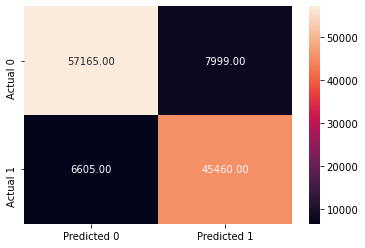

In [52]:
y_pred=rf_model.predict(X1_test)
cm=confusion_matrix(y1_test,y_pred)

TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

sns.heatmap(cm,xticklabels=['Predicted 0','Predicted 1'],annot=True,yticklabels=['Actual 0','Actual 1'],fmt='.2f')

Here, Clearly shows that the values of True Predictions are greater than False Predictions.

In [53]:
y_pred=rf_model.predict(X1_test)
classi_report=classification_report(y1_test,y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     65164
           1       0.85      0.87      0.86     52065

    accuracy                           0.88    117229
   macro avg       0.87      0.88      0.87    117229
weighted avg       0.88      0.88      0.88    117229



Accuracy score for Random Forest Model is 88%. It clearly shows that, by using ensemble technique, accuracy score has been increased.

## Ada Boosting 

In [54]:
ad_model=AdaBoostClassifier(n_estimators=40,random_state=10)
ad_model=ad_model.fit(X1_train,y1_train)

<AxesSubplot:>

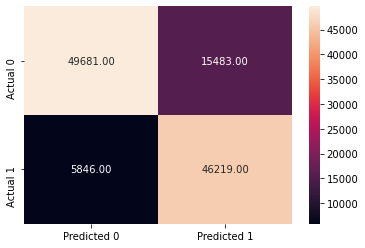

In [55]:
y_pred=ad_model.predict(X1_test)
cm=confusion_matrix(y1_test,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],fmt='.2f')

In [56]:
classi_report=classification_report(y1_test,y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     65164
           1       0.75      0.89      0.81     52065

    accuracy                           0.82    117229
   macro avg       0.82      0.83      0.82    117229
weighted avg       0.83      0.82      0.82    117229



Accuracy Score for Ada Boosting model is 82%

## Gradient Boosting

In [57]:
gb_model=GradientBoostingClassifier(n_estimators=40,random_state=10)
gb_model=gb_model.fit(X1_train,y1_train)

<AxesSubplot:>

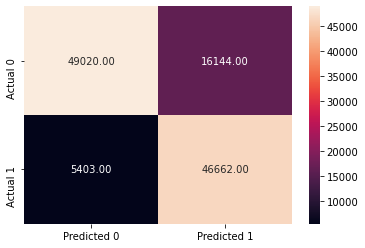

In [58]:
y_pred=gb_model.predict(X1_test)
cm=confusion_matrix(y1_test,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],fmt='.2f')

In [59]:
classi_report=classification_report(y1_test,y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     65164
           1       0.74      0.90      0.81     52065

    accuracy                           0.82    117229
   macro avg       0.82      0.82      0.82    117229
weighted avg       0.83      0.82      0.82    117229



Accuracy score for Gradient Boosting model is 82%.

## XG Boosting

In [60]:
xg_model=XGBClassifier(random_state=10)
xg_model=xg_model.fit(X1_train,y1_train)

[18:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

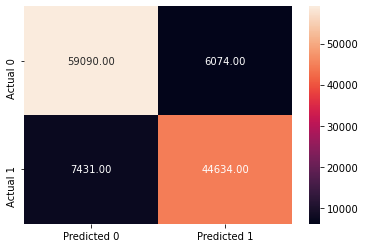

In [61]:
y_pred=xg_model.predict(X1_test)
cm=confusion_matrix(y1_test,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],fmt='.2f')

In [62]:
classi_report=classification_report(y1_test,y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     65164
           1       0.88      0.86      0.87     52065

    accuracy                           0.88    117229
   macro avg       0.88      0.88      0.88    117229
weighted avg       0.88      0.88      0.88    117229



The accuracy score for XG Boost model is 88%

## Regularization

### Ridge

In [63]:
ridge= Ridge(random_state=10,alpha=0.01)
ridge_model=ridge.fit(X1_test,y1_test)

<AxesSubplot:>

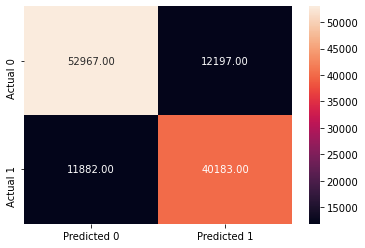

In [64]:
y_pred_prob=ridge_model.predict(X1_test)
y_pred=[0 if x<0.6 else 1 for x in y_pred_prob]
cm=confusion_matrix(y1_test,y_pred)

sns.heatmap(cm,annot=True,yticklabels=['Actual 0','Actual 1'],xticklabels=['Predicted 0','Predicted 1'],fmt='.2f')

In [65]:
classi_report=classification_report(y1_test,y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     65164
           1       0.77      0.77      0.77     52065

    accuracy                           0.79    117229
   macro avg       0.79      0.79      0.79    117229
weighted avg       0.79      0.79      0.79    117229



Ridge model with optimal threshold value has been accuracy as 79%.

### Lasso

In [66]:
lasso=Lasso(random_state=10,alpha=0.01)
lasso_model=lasso.fit(X1_test,y1_test)

<AxesSubplot:>

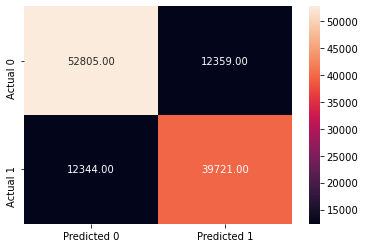

In [67]:
y_pred_prob=lasso_model.predict(X1_test)
y_pred=[0 if x<0.6 else 1 for x in y_pred_prob]
cm=confusion_matrix(y1_test,y_pred)

sns.heatmap(cm,annot=True,yticklabels=['Actual 0','Actual 1'],xticklabels=['Predicted 0','Predicted 1'],fmt='.2f')

In [68]:
classi_report=classification_report(y_pred,y1_test)
print(classi_report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     65149
           1       0.76      0.76      0.76     52080

    accuracy                           0.79    117229
   macro avg       0.79      0.79      0.79    117229
weighted avg       0.79      0.79      0.79    117229



Lasso model came with an accuracy as 56%

## Cross Validation

In [69]:
log_reg=LogisticRegression(random_state=10)
cv1=cross_val_score(estimator=log_reg,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv1=cv1.mean()
cv1

0.7463808244477578

In [70]:
rf=RandomForestClassifier(random_state=10)
cv2=cross_val_score(estimator=rf,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv2=cv2.mean()
cv2

0.8719205280806606

In [71]:
adboost=AdaBoostClassifier(random_state=10)
cv3=cross_val_score(estimator=adboost,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv3=cv3.mean()
cv3

0.8195332957697982

In [72]:
gdboost=GradientBoostingClassifier(random_state=10)
cv4=cross_val_score(estimator=gdboost,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv4=cv4.mean()
cv4

0.8360161369238845

In [162]:
xgboost=XGBClassifier()
cv5=cross_val_score(estimator=xgboost,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv5=cv5.mean()
cv5

[06:23:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:24:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:25:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8853047053619122

## Fine tuning the models by using GridSearchCV

In [88]:
rf_model=RandomForestClassifier(n_estimators=400,max_depth=110,random_state=10)
rf_model=rf_model.fit(X1_train,y1_train)

<AxesSubplot:>

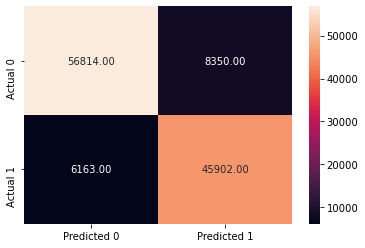

In [89]:
y_pred=rf_model.predict(X1_test)
#y_pred=[0 if x<0.6 else 1 for x in y_pred_prob]
cm=confusion_matrix(y1_test,y_pred)

sns.heatmap(cm,annot=True,yticklabels=['Actual 0','Actual 1'],xticklabels=['Predicted 0','Predicted 1'],fmt='.2f')

In [90]:
classi_report=classification_report(y1_test,y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     65164
           1       0.85      0.88      0.86     52065

    accuracy                           0.88    117229
   macro avg       0.87      0.88      0.88    117229
weighted avg       0.88      0.88      0.88    117229



## Feature Importances

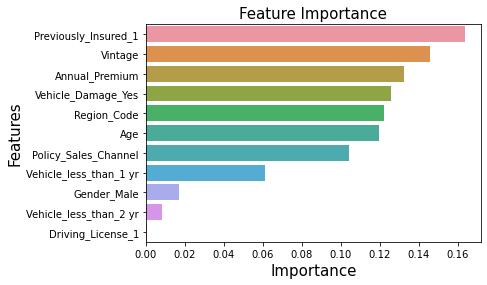

In [99]:
important_features = pd.DataFrame({'Features': X1_train.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

Inference: In the above plot, we could see that the feature Previously_Insured_1 is the most important feature.

## Summary of Models
**Logistic Regression:**

            precision    recall  f1-score   support

        0       0.61      0.74      0.67     65164
        1       0.55      0.40      0.46     52065

    accuracy                           0.59    117229
                 
**Logistic Regression with Optimal threshold value:**

             precision    recall  f1-score   support

         0       0.83      0.80      0.81     65164
         1       0.76      0.79      0.78     52065

    accuracy                           0.80    117229
           
**Random Forest:**

              precision    recall  f1-score   support

          0       0.90      0.88      0.89     65164
          1       0.85      0.87      0.86     52065

    accuracy                           0.88    117229
 
**Ada Boost:**

              precision    recall  f1-score   support

          0       0.89      0.76      0.82     65164
          1       0.75      0.89      0.81     52065

    accuracy                           0.82    117229
           
**Gradient Boost:**
 
              precision    recall  f1-score   support

          0       0.90      0.75      0.82     65164
          1       0.74      0.90      0.81     52065

    accuracy                           0.82    117229
           
**XG Boost:**
 
              precision    recall  f1-score   support

          0       0.89      0.91      0.90     65164
          1       0.88      0.86      0.87     52065

    accuracy                           0.88    117229
           
**Ridge:**
 
              precision    recall  f1-score   support

          0       0.82      0.81      0.81     65164
          1       0.77      0.77      0.77     52065

    accuracy                           0.79    117229
    
**Lasso:**

              precision    recall  f1-score   support

          0       0.81      0.81      0.81     65149
          1       0.76      0.76      0.76     52080

    accuracy                           0.79    117229

**Random Forest with Tuned Parameter:**
 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     65164
           1       0.85      0.88      0.86     52065

    accuracy                           0.88    117229

### Inference: It seems Random Forest model and Xg boost model are good. Because, these models are giving higher accuracy than all other models. Thus, what we can conclude is, we can suggest the company to build by using either Random Forest or XG Boost to predict whether the customer is interested in buying Vehicle Insurance or not.